In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

data_frame = pd.read_csv(r"C:\Users\lenovo\Desktop\Project\predictive_maintenance_dataset.csv")

data_frame

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [77]:
#Data Preprocessing

data_frame.shape

(124494, 12)

In [78]:
data_frame.drop_duplicates(inplace = True)

data_frame.shape

(124493, 12)

In [79]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124493 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124493 non-null  object
 1   device   124493 non-null  object
 2   failure  124493 non-null  int64 
 3   metric1  124493 non-null  int64 
 4   metric2  124493 non-null  int64 
 5   metric3  124493 non-null  int64 
 6   metric4  124493 non-null  int64 
 7   metric5  124493 non-null  int64 
 8   metric6  124493 non-null  int64 
 9   metric7  124493 non-null  int64 
 10  metric8  124493 non-null  int64 
 11  metric9  124493 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 12.3+ MB


In [80]:
data_frame.describe().round()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124493.0,124493.0,124493.0,124493.0,124493.0,124493.0,124493.0,124493.0,124493.0,124493.0
mean,0.0,122387538.0,159.0,10.0,2.0,14.0,260173.0,0.0,0.0,13.0
std,0.0,70459335.0,2180.0,186.0,23.0,16.0,99151.0,7.0,7.0,276.0
min,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0
25%,0.0,61283456.0,0.0,0.0,0.0,8.0,221452.0,0.0,0.0,0.0
50%,0.0,122797128.0,0.0,0.0,0.0,10.0,249800.0,0.0,0.0,0.0
75%,0.0,183309088.0,0.0,0.0,0.0,12.0,310266.0,0.0,0.0,0.0
max,1.0,244140480.0,64968.0,24929.0,1666.0,98.0,689161.0,832.0,832.0,70000.0


In [81]:
data_frame["date"] = pd.to_datetime(data_frame["date"])

data_frame["active_days"] = data_frame["date"] - data_frame["date"][0]
data_frame["active_days"] = data_frame["active_days"].dt.days.astype("int64")
data_frame["month"] = data_frame["date"].dt.month
data_frame["day_of_month"] = data_frame["date"].dt.day
data_frame["week_day"] = data_frame["date"].dt.weekday
data_frame["week_day"].replace(0,7, inplace = True)
data_frame["weekend"] = data_frame["week_day"].apply(lambda x: 1 if x >= 6 else 0)

for i in range(1, 10):
    column = "metric" + str(i)
    data_frame[column] = (data_frame[column] - data_frame[column].min()) / (data_frame[column].max() - data_frame[column].min())

data_frame

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,active_days,month,day_of_month,week_day,weekend
0,2015-01-01,S1F01085,0,0.883224,0.000847,0.000000,0.031212,0.051546,0.591204,0.000000,0.000000,0.000100,0,1,1,3,0
1,2015-01-01,S1F0166B,0,0.251374,0.000000,0.000120,0.000000,0.051546,0.585017,0.000000,0.000000,0.000000,0,1,1,3,0
2,2015-01-01,S1F01E6Y,0,0.709821,0.000000,0.000000,0.000000,0.113402,0.344461,0.000000,0.000000,0.000000,0,1,1,3,0
3,2015-01-01,S1F01JE0,0,0.326427,0.000000,0.000000,0.000000,0.051546,0.595191,0.000000,0.000000,0.000000,0,1,1,3,0
4,2015-01-01,S1F01R2B,0,0.556935,0.000000,0.000000,0.000000,0.144330,0.454420,0.000000,0.000000,0.000043,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,0.074999,0.000000,0.000000,0.000000,0.092784,0.513234,0.009615,0.009615,0.000000,305,11,2,7,1
124490,2015-11-02,Z1F0Q8RT,0,0.706793,0.001478,0.004292,0.002401,0.103093,0.482888,0.000000,0.000000,0.000186,305,11,2,7,1
124491,2015-11-02,Z1F0QK05,0,0.077943,0.074375,0.000000,0.000000,0.103093,0.508453,0.000000,0.000000,0.000000,305,11,2,7,1
124492,2015-11-02,Z1F0QL3N,0,0.929602,0.000000,0.000000,0.000000,0.113402,0.520889,0.000000,0.000000,0.000000,305,11,2,7,1


In [82]:
#Descriptive Analysis

data_frame["failure"].value_counts(normalize = True)

failure
0    0.999149
1    0.000851
Name: proportion, dtype: float64

In [83]:
data_frame["device"]

0         S1F01085
1         S1F0166B
2         S1F01E6Y
3         S1F01JE0
4         S1F01R2B
            ...   
124489    Z1F0MA1S
124490    Z1F0Q8RT
124491    Z1F0QK05
124492    Z1F0QL3N
124493    Z1F0QLC1
Name: device, Length: 124493, dtype: object

In [84]:
data_frame["device_model"] = data_frame["device"].str[:4]
data_frame["device_model"].value_counts()

device_model
S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

In [85]:
failure_per_devices_model = data_frame.groupby("device_model")["failure"].sum()
print(failure_per_devices_model)

device_model
S1F0    36
S1F1     6
W1F0    27
W1F1    15
Z1F0    13
Z1F1     9
Z1F2     0
Name: failure, dtype: int64


In [86]:
non_failure_per_devices_model = data_frame[data_frame["failure"] == 0].groupby("device_model").size()
print(non_failure_per_devices_model)

device_model
S1F0    33132
S1F1    21683
W1F0    23267
W1F1    19959
Z1F0    18856
Z1F1     7239
Z1F2      251
dtype: int64


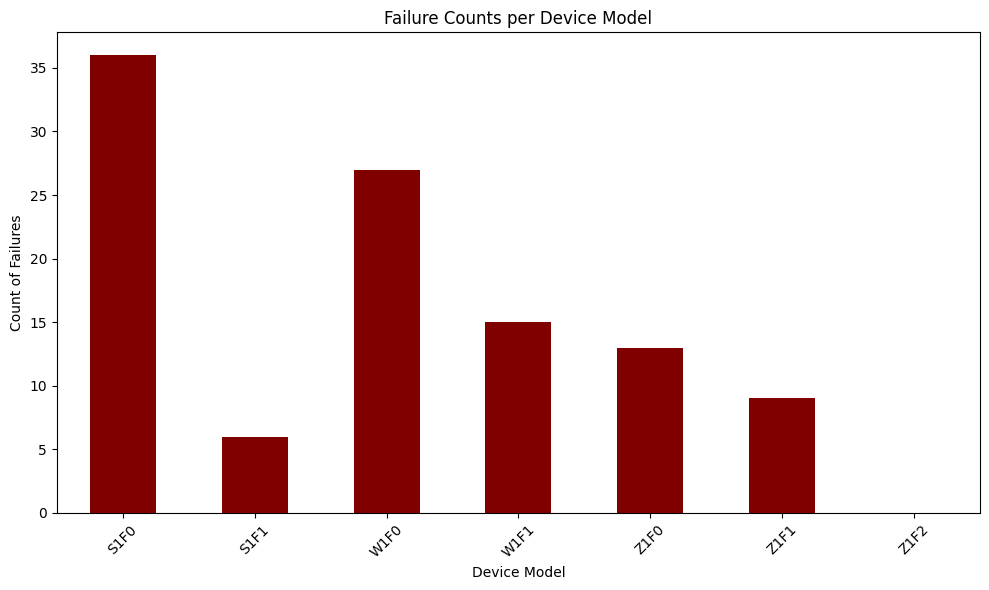

In [87]:
plt.figure(figsize = (10, 6))
failure_per_devices_model.plot(kind = "bar", color = "maroon")
plt.title("Failure Counts per Device Model")
plt.xlabel("Device Model")
plt.ylabel("Count of Failures")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

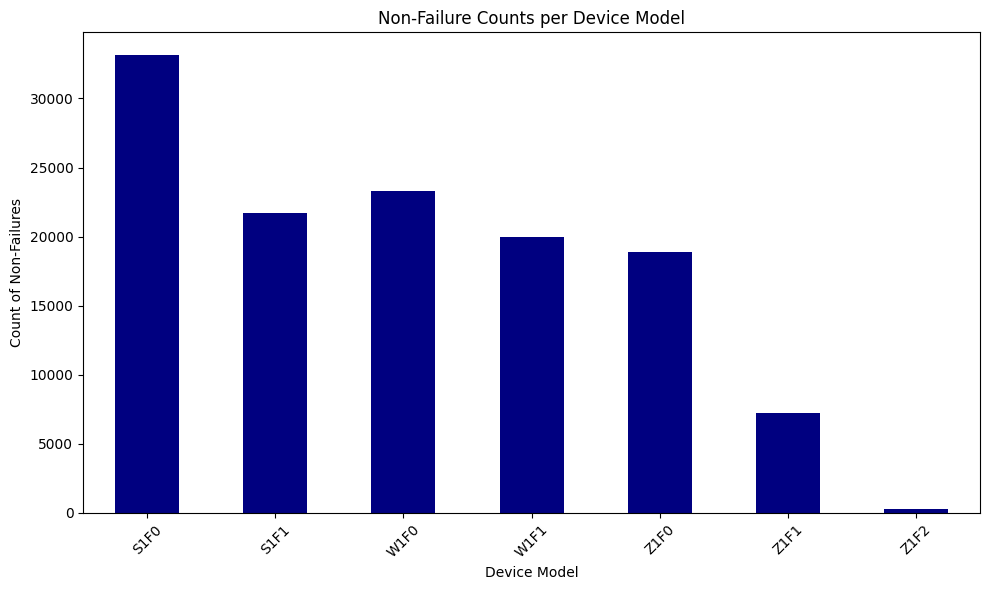

In [88]:
plt.figure(figsize = (10, 6))
non_failure_per_devices_model.plot(kind = "bar", color = "navy")
plt.title("Non-Failure Counts per Device Model")
plt.xlabel("Device Model")
plt.ylabel("Count of Non-Failures")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [89]:
data_frame.drop(data_frame[data_frame["device_model"] == "Z1F2"].index, inplace=True)

data_frame.shape

(124242, 18)

Distribution for failure is 0


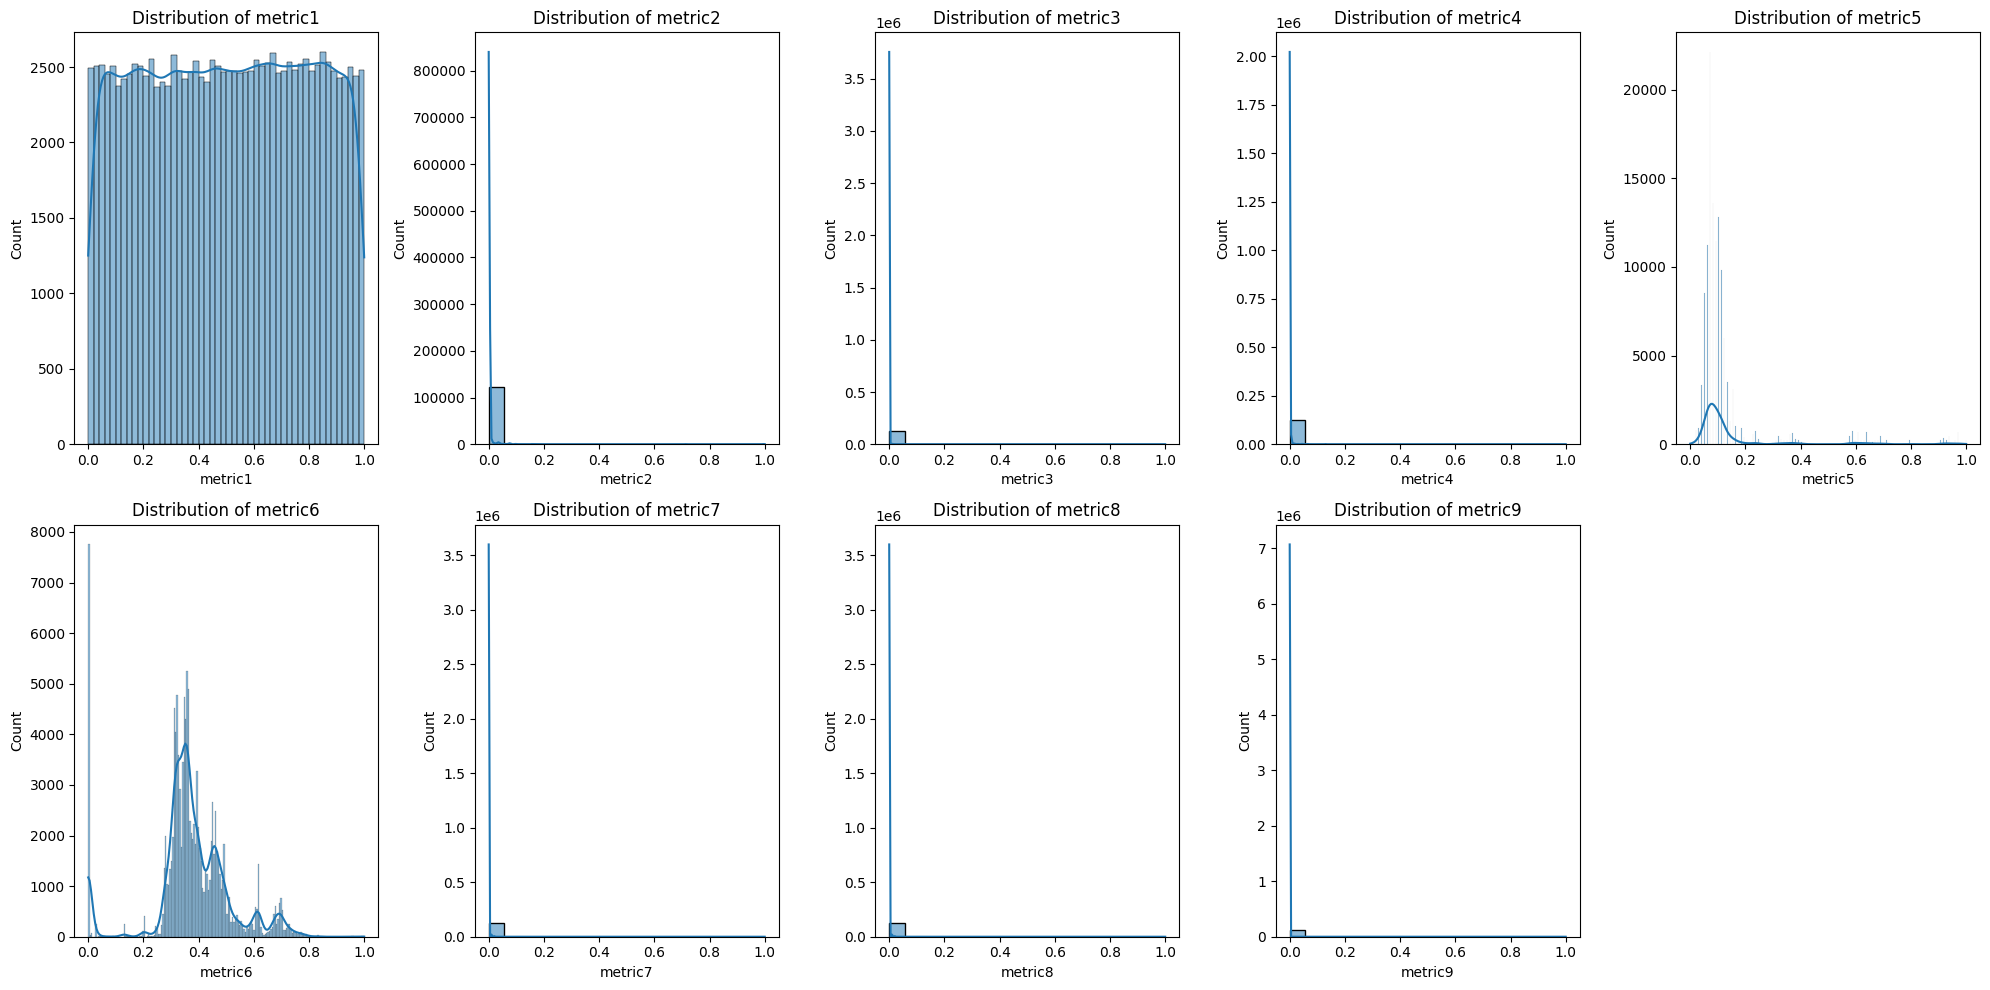

In [90]:
plt.figure(figsize=(4*5, 2*5))
print("Distribution for failure is 0")
mask = data_frame["failure"] == 0
for i, col in enumerate(["metric1", "metric2", "metric3", "metric4", "metric5", "metric6", "metric7", "metric8", "metric9"]):
    plt.subplot(2, 5, i + 1)
    sns.histplot(data=data_frame.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Distribution for failure is 1


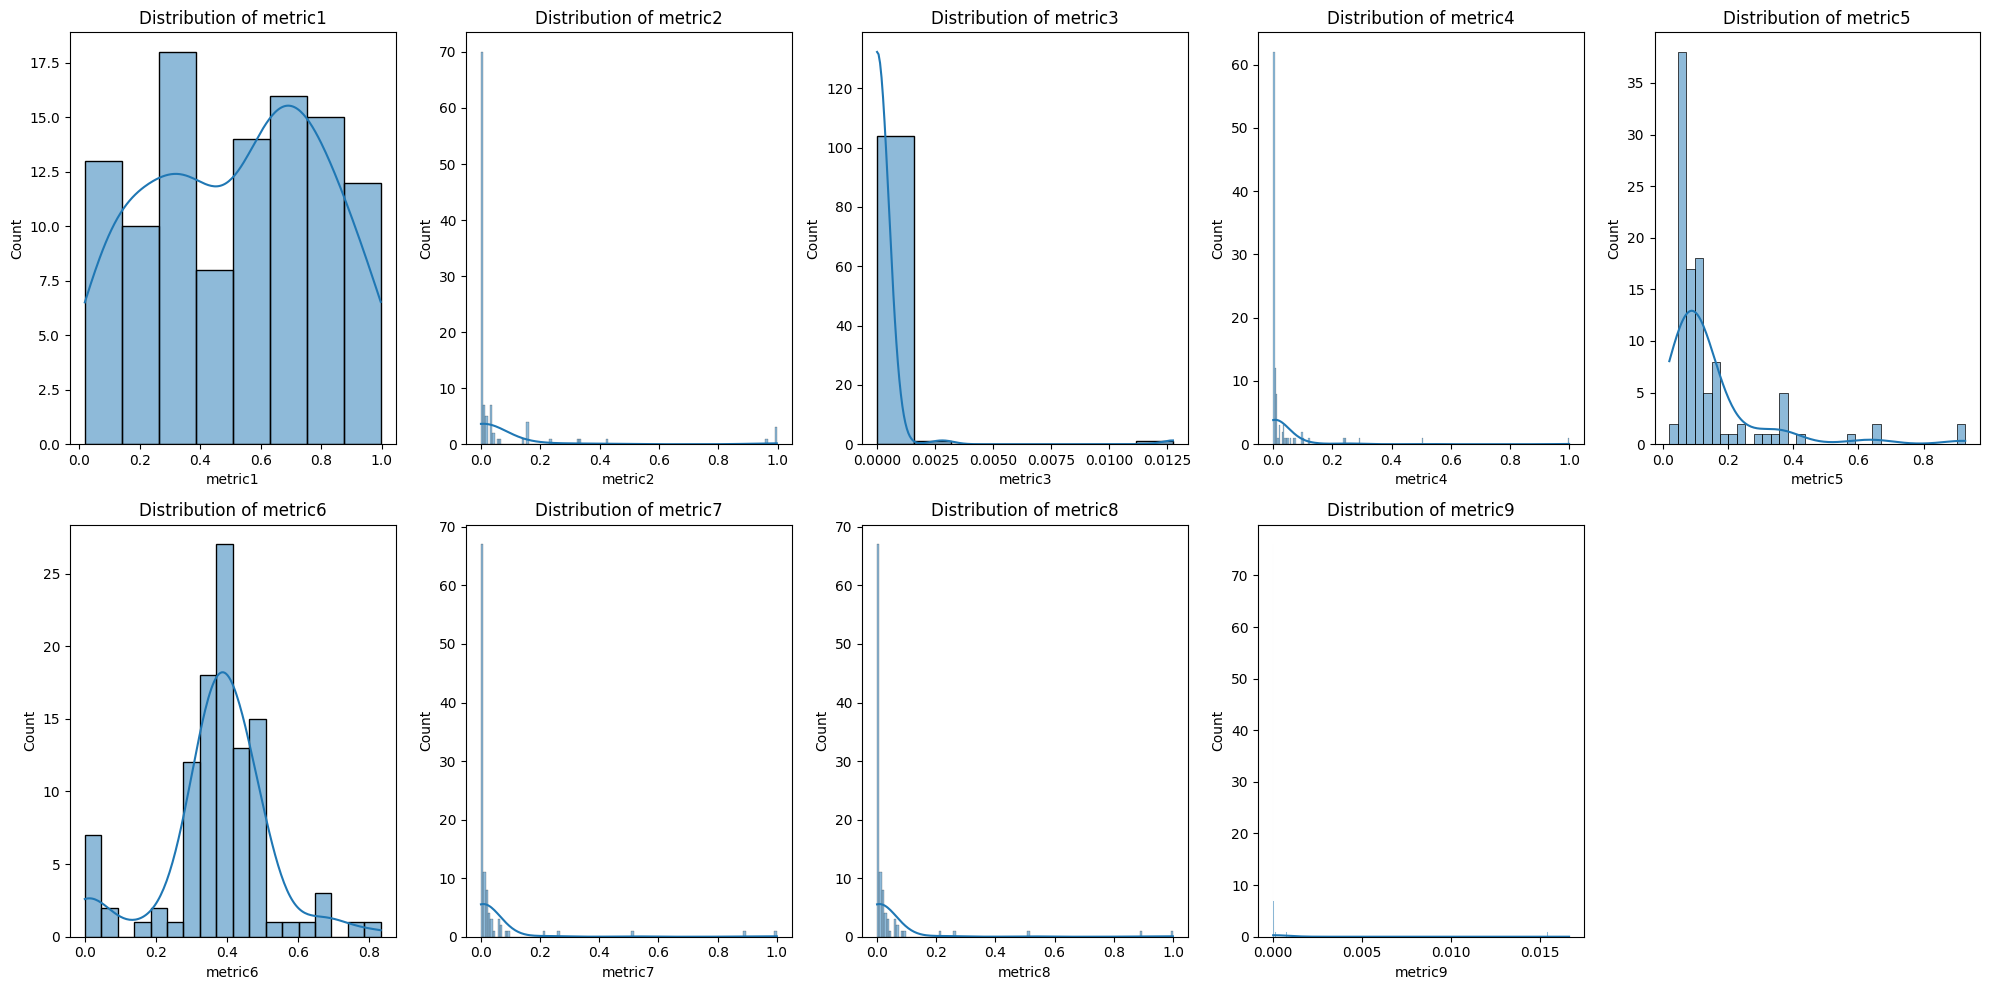

In [91]:
plt.figure(figsize=(4*5, 2*5))
print("Distribution for failure is 1")
mask = data_frame["failure"] == 1
for i, col in enumerate(["metric1", "metric2", "metric3", "metric4", "metric5", "metric6", "metric7", "metric8", "metric9"]):
    plt.subplot(2, 5, i + 1)
    sns.histplot(data=data_frame.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Failure over Time by Month')

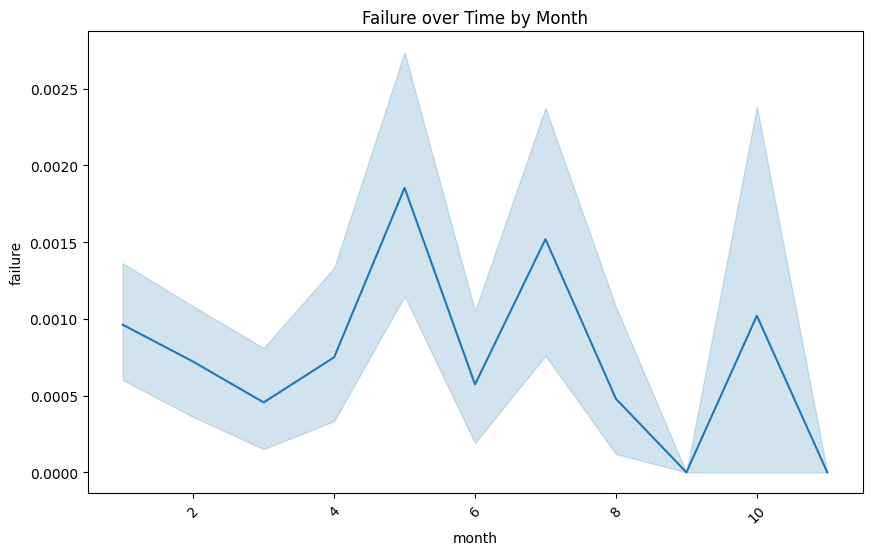

In [92]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = data_frame, x = "month", y = "failure")
plt.xticks(rotation = 45)
plt.title("Failure over Time by Month")

Text(0.5, 1.0, 'Correlation Matrix')

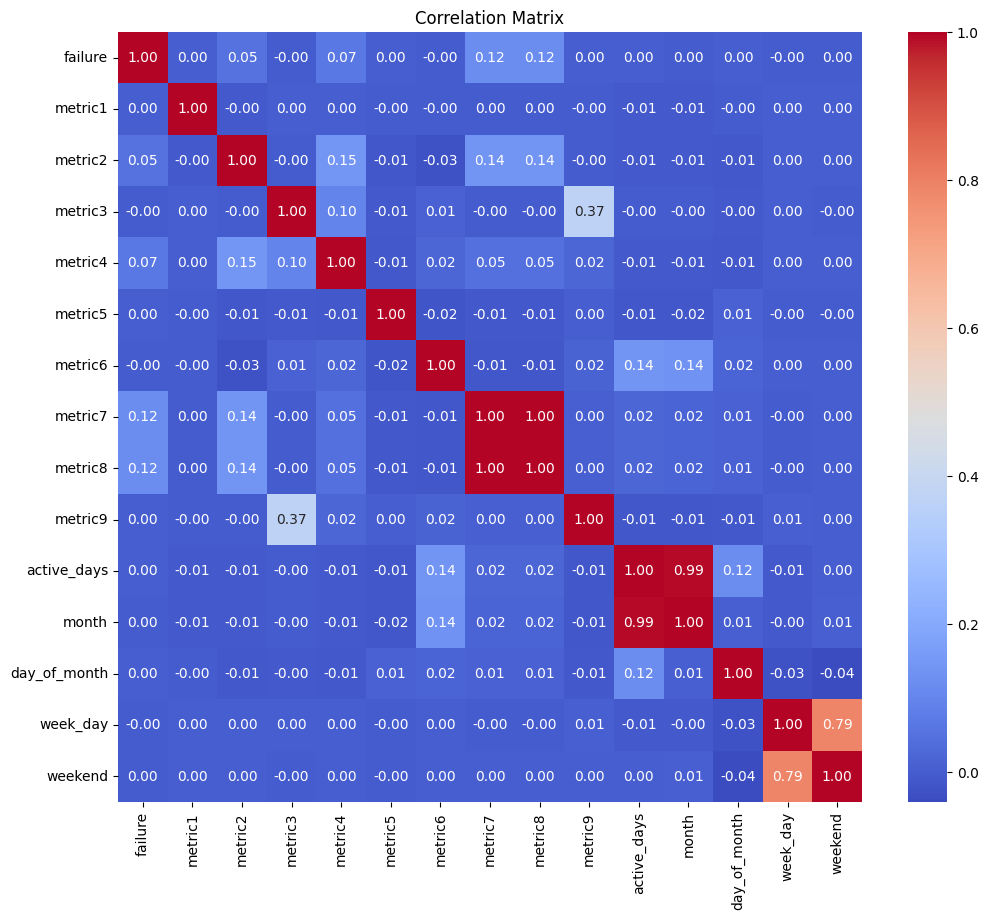

In [93]:
numeric_cols = data_frame.select_dtypes(include = [np.number])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlation Matrix")

In [94]:
#Data Selection

del data_frame["date"]
del data_frame["month"]
del data_frame["device"]
del data_frame["metric8"]
del data_frame["weekend"]

In [95]:
#Feature Mining

data_frame = pd.get_dummies(data_frame, drop_first = True)

data_frame

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,active_days,day_of_month,week_day,device_model_S1F1,device_model_W1F0,device_model_W1F1,device_model_Z1F0,device_model_Z1F1
0,0,0.883224,0.000847,0.000000,0.031212,0.051546,0.591204,0.000000,0.000100,0,1,3,False,False,False,False,False
1,0,0.251374,0.000000,0.000120,0.000000,0.051546,0.585017,0.000000,0.000000,0,1,3,False,False,False,False,False
2,0,0.709821,0.000000,0.000000,0.000000,0.113402,0.344461,0.000000,0.000000,0,1,3,False,False,False,False,False
3,0,0.326427,0.000000,0.000000,0.000000,0.051546,0.595191,0.000000,0.000000,0,1,3,False,False,False,False,False
4,0,0.556935,0.000000,0.000000,0.000000,0.144330,0.454420,0.000000,0.000043,0,1,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,0.074999,0.000000,0.000000,0.000000,0.092784,0.513234,0.009615,0.000000,305,2,7,False,False,False,True,False
124490,0,0.706793,0.001478,0.004292,0.002401,0.103093,0.482888,0.000000,0.000186,305,2,7,False,False,False,True,False
124491,0,0.077943,0.074375,0.000000,0.000000,0.103093,0.508453,0.000000,0.000000,305,2,7,False,False,False,True,False
124492,0,0.929602,0.000000,0.000000,0.000000,0.113402,0.520889,0.000000,0.000000,305,2,7,False,False,False,True,False


In [96]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124242 entries, 0 to 124493
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   failure            124242 non-null  int64  
 1   metric1            124242 non-null  float64
 2   metric2            124242 non-null  float64
 3   metric3            124242 non-null  float64
 4   metric4            124242 non-null  float64
 5   metric5            124242 non-null  float64
 6   metric6            124242 non-null  float64
 7   metric7            124242 non-null  float64
 8   metric9            124242 non-null  float64
 9   active_days        124242 non-null  int64  
 10  day_of_month       124242 non-null  int32  
 11  week_day           124242 non-null  int32  
 12  device_model_S1F1  124242 non-null  bool   
 13  device_model_W1F0  124242 non-null  bool   
 14  device_model_W1F1  124242 non-null  bool   
 15  device_model_Z1F0  124242 non-null  bool   
 16  device_

In [97]:
PCA = PCA(n_components = 2)
PCA.fit(data_frame)
results = PCA.transform(data_frame)

print(results)

[[-105.52094959  -12.46401128]
 [-105.52093849  -12.46402096]
 [-105.52101096  -12.4640112 ]
 ...
 [ 199.46406113  -15.60785818]
 [ 199.46404719  -15.60783956]
 [ 199.46406151  -15.60786233]]


In [98]:
data_frame["PCA0"] = results[: , 0]
data_frame["PCA1"] = results[: , 1]

In [99]:
data_frame.to_csv("data_processing_results.csv", index = False)